In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

# Combine into a single DataFrame for easy analysis
df = pd.concat([X, y], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


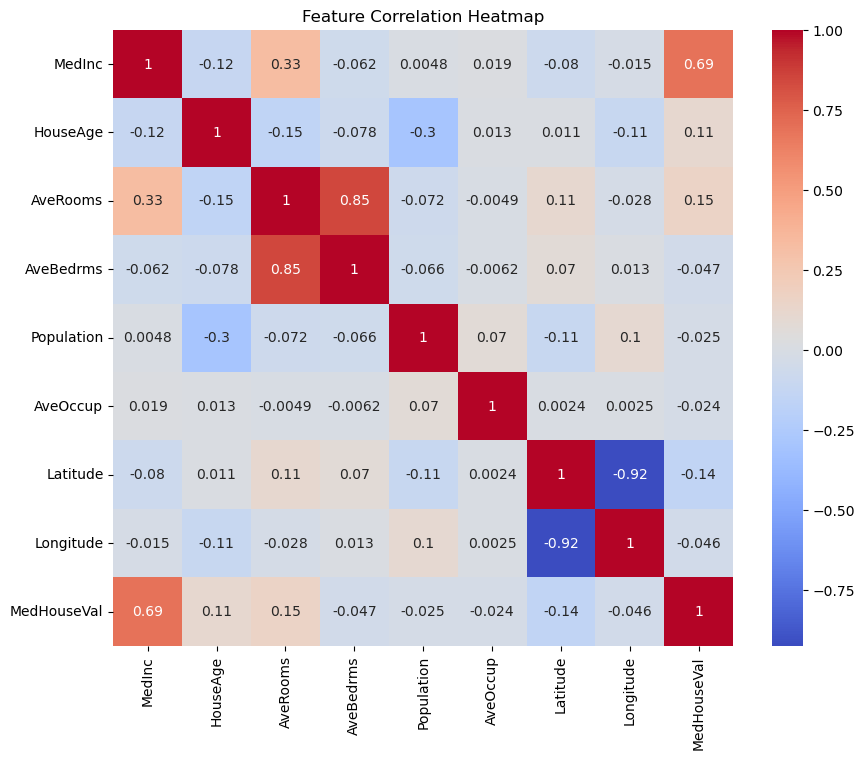

In [3]:
df.describe()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 0.56
R² Score: 0.58


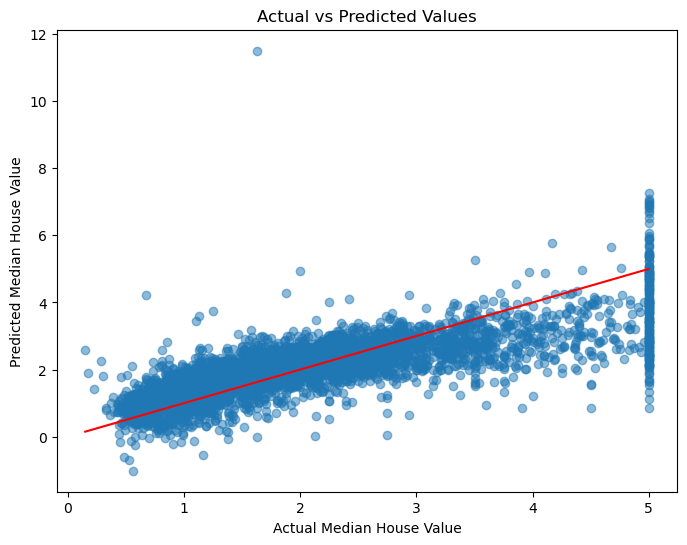

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

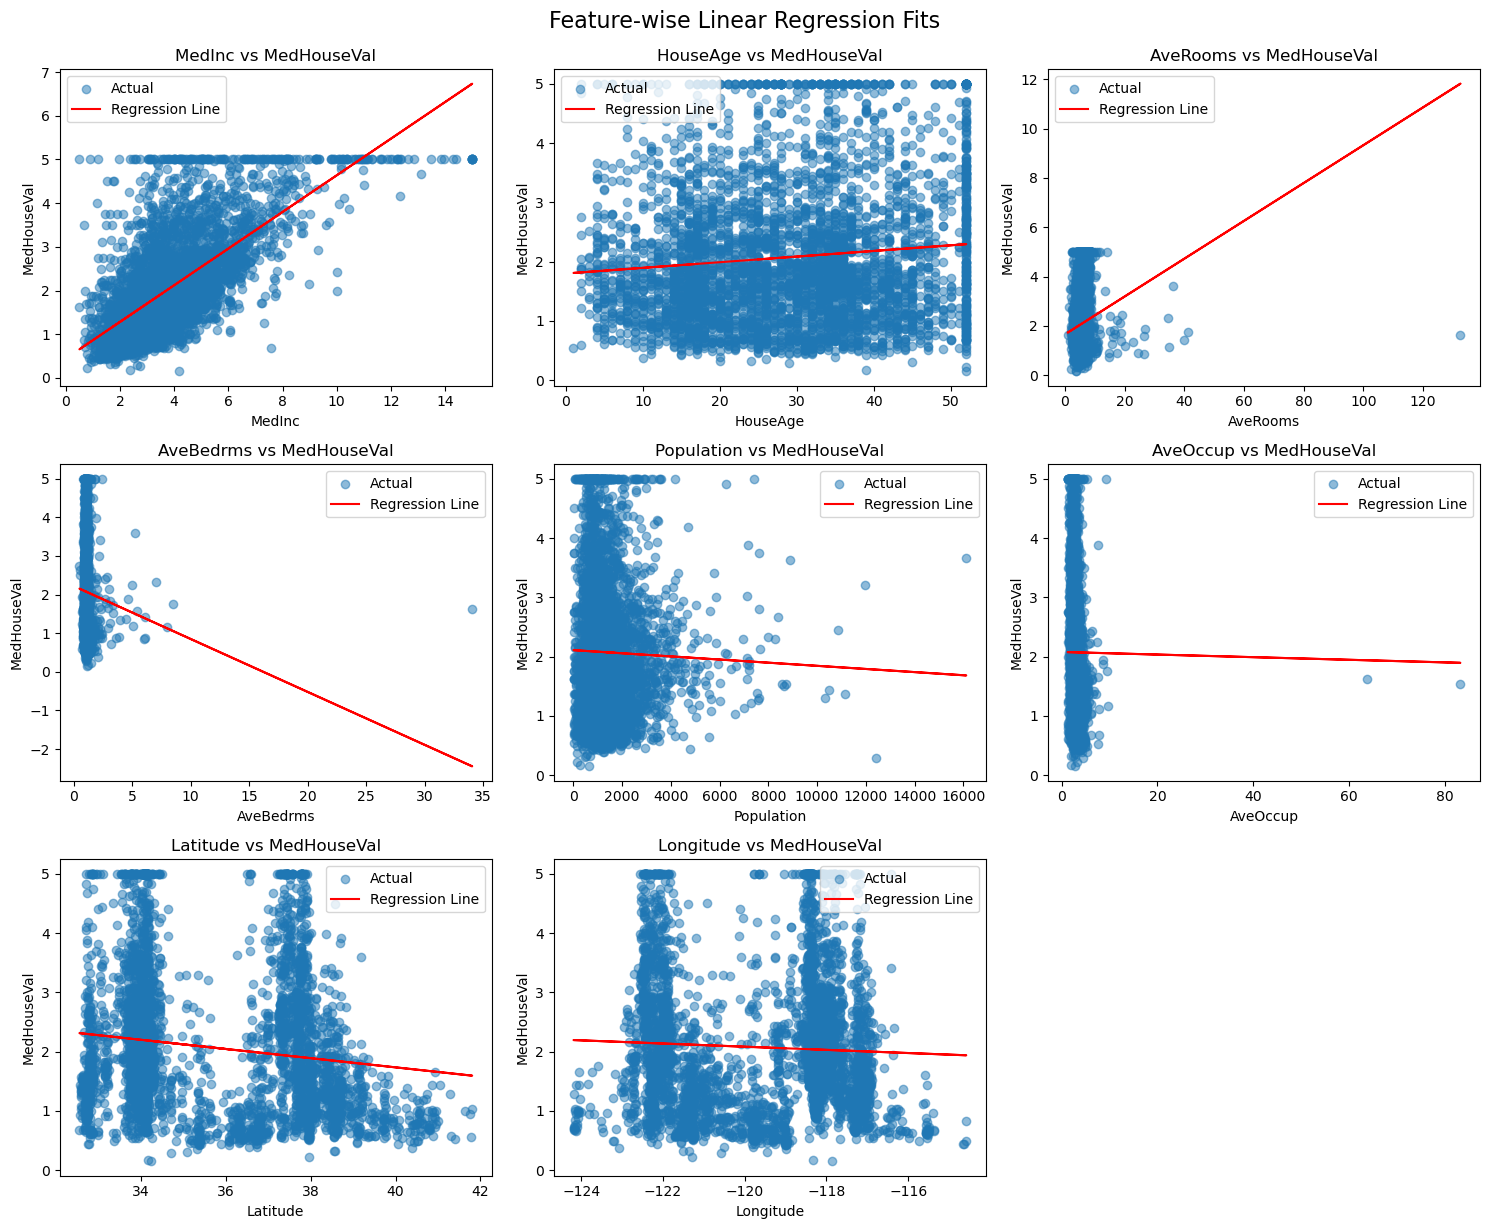

In [10]:
from sklearn.linear_model import LinearRegression

# Plot regression line for each feature individually
features = X.columns
n_features = len(features)
n_cols = 3  # plots per row
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features):
    X_feat = X[[feature]]
    X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, y, test_size=0.2, random_state=42)
    
    model_feat = LinearRegression()
    model_feat.fit(X_train_feat, y_train_feat)
    y_pred_line = model_feat.predict(X_test_feat)
    
    # Plot
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X_test_feat, y_test_feat, alpha=0.5, label='Actual')
    plt.plot(X_test_feat, y_pred_line, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
    plt.title(f"{feature} vs MedHouseVal")
    plt.tight_layout()
    plt.legend()

plt.suptitle("Feature-wise Linear Regression Fits", fontsize=16, y=1.02)
plt.show()
